# HSTaXe Installation

Follow instructions from https://github.com/spacetelescope/hstaxe to install 'hstaxe'

# Load a few Python modules

In [1]:
from astropy.io import fits
import numpy as np
import os, shutil
import matplotlib.pyplot as plt
%matplotlib inline

from drizzlepac import astrodrizzle

from hstaxe import axetasks



The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       config_testbed      imagefindpars           mapreg       
       photeq            pixreplace           pixtopix            pixtosky      
  refimagefindpars       resetbits          runastrodriz          skytopix      
     tweakback            tweakreg           updatenpol
Saving hstaxe logging to 'axe_output.log'

*********************************************************************
* Welcome to hstaxe!
This version is independent of IRAF and PyRAF. *
*********************************************************************

AXE_IMAGE_PATH already exists, using.
AXE_OUTPUT_PATH already exists, using.
AXE_CONFIG_PATH already exists, using.
AXE_DRIZZLE_PATH already exists, using.
AXE_SIMDATA_PATH already exists, using.
AXE_OUTSIM_PATH already exists,

We save the current working directory

In [2]:
cwd = os.getcwd()
print("We are in %s" % (cwd))

We are in /Users/nhathi/hstaxe1_test/aXe_ACS_Cookbook


# Preparing the G800L data

We will create a G800L subdirectory to copy all of the G800L files into. This where we will prepare the G800L data

Creating the directory, removing any existing one

In [3]:
os.chdir(cwd)
if os.path.isdir("G800L"):
    shutil.rmtree("G800L")
os.mkdir("G800L")

Copying the G800L data (which we grab from our cookbook_data directory)

In [4]:
os.system("cp cookbook_data/G800L/*flc.fits G800L/")
os.system("cp cookbook_data/G800L/G800L.lis G800L/")

0

We move into the G800L directory and check the content of the G800L.lis file

In [5]:
os.chdir(cwd)
os.chdir("G800L")
!cat G800L.lis

jdql01jxq_flc.fits


We now create a G800L mosaic using the G800L data  **(in this case, only 1 image is drizzled but you could have multiple images)**

This mosaic will be used to set up the proper astrometry for each individual FLT / FLC (CTE corrected) files. We can only extract G800L spectra from FLT / FLC files which have been used to make this mosaic

In [6]:
astrodrizzle.AstroDrizzle("@G800L.lis",output="G800L",build=True,driz_sep_wcs=True,median=False,blot=False,driz_cr=False,driz_combine=True,final_wcs=False)

Setting up logfile :  astrodrizzle.log
AstroDrizzle Version 3.1.8 (2020-07-27 10:34:52 -0400) started at: 17:47:31.062 (01/04/2021)

==== Processing Step  Initialization  started at  17:47:31.065 (01/04/2021)

Preserving original of:  jdql01jxq_flc.fits as  OrIg_files/jdql01jxq_flc.fits
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 264.0849717926022  -32.91020831412446  
CRPIX : 2106.5  2119.5  
CD1_1 CD1_2  : 1.344027554475385e-06  -1.3823705165429136e-05  
CD2_1 CD2_2  : -1.3823705165429136e-05  -1.344027554475385e-06  
NAXIS : 4213  4239
********************************************************************************
*
*  Estimated memory usage:  up to 536 Mb.
*  Output image size:       4213 X 4239 pixels. 
*  Output image file:       ~ 204 Mb. 
*  Cores available:         2
*
********************************************************************************
==== Processing Step Initialization finished at 17:47:31.753 (01/04/2021)
==== Processing Step  

We now prepare the F775W Imaging data

We already created a mosaic of all the G800L data for astrometric purposes, and we now create an F775W mosaic using the G800L mosaic as the astrometric reference frame. This will ensure that the G800L and F775W mosaics have pixels with the same RA and DEC. The process is similar to what we did with the G800L data and we do this in a F775W sub-directory. The F775W mosaic is generated with the same WCS as the G800L mosaic we already generated.

Creating the directory, removing any existing one

In [7]:
os.chdir(cwd)

if os.path.isdir("F775W"):
    shutil.rmtree("F775W")

os.mkdir("F775W")

Copy the F775W data (which we grab from our cookbook_data directory)

In [8]:
os.system("cp cookbook_data/F775W/*flc.fits F775W/")
os.system("cp cookbook_data/F775W/F775W.lis F775W/")

0

We move into the F775W directory and check the content of the F775W.lis file

In [9]:
os.chdir(cwd)
os.chdir("F775W")
!cat F775W.lis

jdql01jvq_flc.fits


We create a F775W mosaic using the F775W data and the G800L mosaic as a reference **(in this case, only 1 image is drizzled)**

In [10]:
ref = "../G800L/G800L_drc.fits[1]"
astrodrizzle.AstroDrizzle("@F775W.lis",output="F775W",in_memory=False,skysub="yes",build=True,driz_sep_wcs=True,driz_sep_refimage=ref,median=False,blot=False,driz_cr=False,driz_combine=True,final_wcs=True,final_refimage=ref)

Setting up logfile :  astrodrizzle.log
AstroDrizzle Version 3.1.8 (2020-07-27 10:34:52 -0400) started at: 17:47:45.057 (01/04/2021)

==== Processing Step  Initialization  started at  17:47:45.0 (01/04/2021)

Preserving original of:  jdql01jvq_flc.fits as  OrIg_files/jdql01jvq_flc.fits
Creating OUTPUT WCS from ../G800L/G800L_drc.fits[1]
WCS Keywords

CD_11  CD_12: 1.34402755447538e-06 -1.3823705165429e-05
CD_21  CD_22: -1.3823705165429e-05 -1.3440275544753e-06
CRVAL    : 264.0849717926022 -32.91020831412446
CRPIX    : 2106.5 2119.5
NAXIS    : 4213 4239
Plate Scale : 0.04999999999999952
ORIENTAT : -95.55320186448087
********************************************************************************
*
*  Estimated memory usage:  up to 536 Mb.
*  Output image size:       4213 X 4239 pixels. 
*  Output image file:       ~ 204 Mb. 
*  Cores available:         2
*
********************************************************************************
==== Processing Step Initialization finished at 17:4

The F775W and G800L should be aligned and bright objects should generate bright spectra in the expected position. We should see very liittle offset in the y-direction for ACS grism data

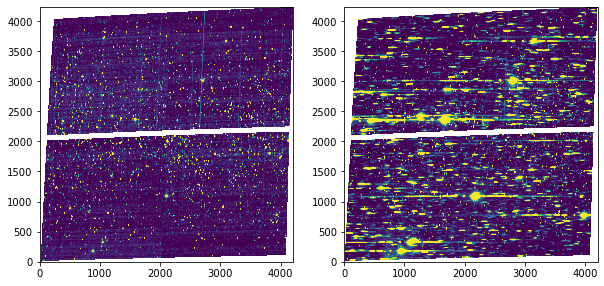

In [11]:
plt.rcParams["figure.figsize"] = (10,7)
plt.subplot(1,2,1)
d = fits.open("F775W_drc.fits")[1].data
im1 = plt.imshow(d,origin="lower")
im1.set_clim(0,7.5)

plt.subplot(1,2,2)
d = fits.open("../G800L/G800L_drc.fits")[1].data
im1 = plt.imshow(d,origin="lower")
im1.set_clim(0,.85)

We create an object catalog using sextractor

This is one step that needs to be done carefully as several things can go wrong.

- Make sure you set the magnitude zeropoint properly for the image you are using
- One can generate a simple catalog using:

sex -c default.sex F775W_drc.fits[1] -DETECT_THRESH 5 -MAG_ZEROPOINT 25.656

or use a full command as given in 'run_sext.e' file (cookbook_data/catalog)

- See default.param for the required parameters that aXe will be looking for.
- Check the resulting regions file and catalog to make sure that all objects have good magnitudes (i.e. no mag of 99.)
- Edit F775W.cat and rename column 'MAG_AUTO' with 'MAG_F7692', or you will get an "aXeError: Catalogue: test.cat does not contain any magnitude column!" error when running iolprep

This catalog, when doing a simple extraction, will be used to compute the SED of each sources. These SEDs will be used to compute our contamination models. In this example, we used a single band, F775W, but we could have added information in other bands such as F814W of F606W for example. This requires running Sextractor in matched photometry mode, and the creation of a catalog where magnitudes in multiple bands are properly listed

For simplicity, here, we copy an already generated catalog:

In [12]:
os.system("cp ../cookbook_data/catalog/F775W.cat .")
!cat F775W.cat

#   1 NUMBER                 Running object number                                     
#   2 X_IMAGE                Object position along x                                    [pixel]
#   3 Y_IMAGE                Object position along y                                    [pixel]
#   4 X_WORLD                Barycenter position along world x axis                     [deg]
#   5 Y_WORLD                Barycenter position along world y axis                     [deg]
#   6 A_IMAGE                Profile RMS along major axis                               [pixel]
#   7 B_IMAGE                Profile RMS along minor axis                               [pixel]
#   8 THETA_IMAGE            Position angle (CCW/x)                                     [deg]
#   9 A_WORLD                Profile RMS along major axis (world units)                 [deg]
#  10 B_WORLD                Profile RMS along minor axis (world units)                 [deg]
#  11 THETA_WORLD            Position angle (CCW/world-x) 

We can now run aXe

We start by setting up some necessary environment variables that point to the various aXe directories. **Make sure that you keep the path length to be less than 80 characters when the code points to individual data files, or about 60 characters without the file names to be safe**

Create a directory called CONF and copy the ACS G800L Calibration files in there.

In [13]:
os.chdir(cwd)
if os.path.isdir("CONF"):
    shutil.rmtree("CONF")
os.mkdir("CONF")

os.system("cp cookbook_data/CONF/* CONF/")

0

Set up some work directories and environment variables required by aXe:

In [14]:
os.chdir(cwd)
import os

if os.path.isdir("DATA"):
    shutil.rmtree("DATA")
os.mkdir("DATA")
os.environ['AXE_IMAGE_PATH'] = cwd+'/DATA/' 
print ('--> variable AXE_IMAGE_PATH   set to '+cwd+'/DATA/')

os.environ['AXE_CONFIG_PATH'] = cwd+'/CONF/'
print ('--> variable AXE_CONFIG_PATH  set to '+cwd+'/CONF/')

if os.path.isdir("OUTPUT"):
    shutil.rmtree("OUTPUT")
os.mkdir("OUTPUT")
os.environ['AXE_OUTPUT_PATH'] = cwd+'/OUTPUT/'
print ('--> variable AXE_OUTPUT_PATH  set to '+cwd+'/OUTPUT/')

if os.path.isdir("DRIZZLE"):
    shutil.rmtree("DRIZZLE")
os.mkdir("DRIZZLE")
os.environ['AXE_DRIZZLE_PATH'] = cwd+'/DRIZZLE/' 
print ('--> variable AXE_DRIZZLE_PATH  set to '+cwd+'/DRIZZLE/')

os.mkdir("DRIZZLE/tmp")

print ("Length of AXE_IMAGE_PATH is",len(os.environ['AXE_IMAGE_PATH']),"characters")

--> variable AXE_IMAGE_PATH   set to /Users/nhathi/hstaxe1_test/aXe_ACS_Cookbook/DATA/
--> variable AXE_CONFIG_PATH  set to /Users/nhathi/hstaxe1_test/aXe_ACS_Cookbook/CONF/
--> variable AXE_OUTPUT_PATH  set to /Users/nhathi/hstaxe1_test/aXe_ACS_Cookbook/OUTPUT/
--> variable AXE_DRIZZLE_PATH  set to /Users/nhathi/hstaxe1_test/aXe_ACS_Cookbook/DRIZZLE/
Length of AXE_IMAGE_PATH is 49 characters


We define the FOV boundaries for the ACS observations.

- Four numbers to specify the modifications

   [left, right, bottom, top] to the target area on the input
   images. E.g. 100,500,10,0 would include in the Input Object
   Lists all objects with -100 < x < x_size + 500 and
   -10 < y < y_size.
   
- at present using 0,0,0,0 but we could change these numbers 


In [15]:
dimension_info = "0,0,0,0"

We copy the G800L FLT / FLC files and the F775W FLT / FLC files in the DATA directory

You can either use the original data or optionally the FLT / FLC files used to create the G800L mosaic earlier, which will have some extra bad pixels flagging

In [16]:
os.system("cp G800L/*flc.fits DATA/")
os.system("cp F775W/*flc.fits DATA/")

0

We use the iolprep aXe task to generate individual F775W catalogs

This task will create the individual F775W extraction catalogs, TWO (1 for chip1 and 1 for chip2) for each of the files listed in the F775W.lis file. We pass the F775W mosaic to it, as it contains all the information about all the individual F775W FLC file. The catalog 'filename_flc_1.cat' corresponds to chip2 and catalog 'filename_flc_2.cat' corresponds to chip1

In [17]:
os.chdir(cwd)
os.chdir("F775W")

axetasks.iolprep(drizzle_image='F775W_drc.fits',
                 input_cat='F775W.cat',
                 dimension_in=dimension_info)

We copy the newly create catalog files into the DATA directory

In [18]:
os.system("cp jdql01jvq*_1.cat ../DATA/")
os.system("cp jdql01jvq*_2.cat ../DATA/")

0

In [19]:
!ls ../DATA

jdql01jvq_flc.fits  jdql01jvq_flc_1.cat jdql01jvq_flc_2.cat jdql01jxq_flc.fits


We are almost ready to extract the spectra. We need to create an file aXe.lis containing the G800L images, expected catalog names and associated F775W direct images

The G800L mosaic we created earlier is not used directly during the aXe extraction process. However, the F775W mosaic was used to create an object master catalog. This catalog will be processed to generate individual object catalogs for the files used to create the F775W mosaic. The aXe.lis file lists which F775W images are logically associated with a particular G800L image. Ideally, these are images taken in the same HST visit so that we can be sure that the WCS of both files are consistent.

The aXe.lis file is a simple text file, with a slightly different format than the one above. In this file, each line contains 3 items:

- The name of a G800L FLT / FLC file (e.g. [grism_rootname]_flc.fits)
- TWO catalog names, separated by comma, corresponding to two chips on ACS/WFC (e.g., [direct_rootname]_flc_2.cat, [direct_rootname]_flc_1.cat) --- be careful about catalog numbering and chip numbers -- they are reversed because of reversed extension numbers: [sci,1] corresponds to chip2 and [sci,2] corresponds to chip1
- The name of the direct imaging file [direct_rootname]_flc.fits associated with the G800L data and the catalog.



In [20]:
os.chdir(cwd)
os.system("cp cookbook_data/aXe.lis .")
!cat aXe.lis

jdql01jxq_flc.fits jdql01jvq_flc_2.cat,jdql01jvq_flc_1.cat jdql01jvq_flc.fits 

We run aXeprep. This task will amongst other things take care of background subtracting the G800L data using a single master sky.

In [21]:
os.chdir(cwd)

axetasks.axeprep(inlist="aXe.lis",
                     configs="ACS.WFC.CHIP1.Cycle13.5.conf,ACS.WFC.CHIP2.Cycle13.5.conf",
                     backgr=True,
                     backims="ACS.WFC.CHIP1.msky.1.smooth.fits,ACS.WFC.CHIP2.msky.1.smooth.fits",
                     norm=True,
                     mfwhm=3.0)

We can now proceed with a simple box extraction of our G800L spectra. This will not combine individual 1D spectra and we create one extracted spectrum per object and get G800L FLT / FLC file we are processing. The contamination is estimated using the Gaussian model of each object that is included in the SExtractor object catalog.

For each of the G800L input FLT / FLC file, this will create the following in the OUTPUT/ directory:

- [rootname]_flc_2.cat : Object catalog for the FLC file [rootname]_flt.fits
- [rootname]_flc_2.OAF : Aperture file
- [rootname]_flc_2.PET.fits : The Pixel Extraction Table, containing all the unbinned information about each spectrum
- [rootname]_flc_2.SPC.fits : 1D extracted spectra
- [rootname]_flc_2.CONT.fits : Contamination estimate for eact of the spectra
- [rootname]_flc_2_opt.SPC.fits : Optimally extracted version of the 1D spectra

While running the next notebook cell, it might take a few minutes to run

In [22]:
# infwhm (extrfwhm) & outfwhm (drzfwhm) can be (5,4)(wide), (4,3)(default) or (3,2)(narrow)
axetasks.axecore('aXe.lis',
                 "ACS.WFC.CHIP1.Cycle13.5.conf,ACS.WFC.CHIP2.Cycle13.5.conf",
                 fconfterm="ACS.WFC.CHIP1.msky.1.smooth.fits,ACS.WFC.CHIP2.msky.1.smooth.fits",
                 extrfwhm=4.,
                 drzfwhm=3.,
                 backfwhm=0.,
                 orient=False,
                 weights=True,
                 slitless_geom=False,
                 cont_model='gauss',
                 sampling='drizzle',
                 exclude=True)


Writing non-linear coefficients to file: DATA/jdql01jxq_flc_coeffs2.dat


Storing non-linear coefficients: 
ACS: WFC

DRZSCALE set to: 0.05

Writing non-linear coefficients to file: DATA/jdql01jxq_flc_coeffs2.dat


Storing non-linear coefficients: 
ACS: WFC

DRZSCALE set to: 0.05


Results are in the directory pointed to by os.environ['AXE_OUTPUT_PATH'], i.e. ./OUTPUT 1D and 2D spectra extracted from individual FLT / FLC files are available. These are not combined. SPC files contained 1D spectra, opt.SPC files contained optimally extracted spectra (using gaussian profiles), STP files contain 2D stamps. CONT files contain the contamination estimate (gaussian based)

In [23]:
!ls OUTPUT/*SPC.fits
!ls OUTPUT/*STP.fits

OUTPUT/jdql01jxq_flc_2.SPC.fits     OUTPUT/jdql01jxq_flc_5.SPC.fits
OUTPUT/jdql01jxq_flc_2_opt.SPC.fits OUTPUT/jdql01jxq_flc_5_opt.SPC.fits
OUTPUT/jdql01jxq_flc_2.STP.fits OUTPUT/jdql01jxq_flc_5.STP.fits


We can examine individual 2D spectra from the STP files. Note that the STP files are meant for quality control and are not calibrated versions of the 2D spectra.

Files 'filename_flc_2.STP.fits' are for chip2 and 'filename_flc_5.STP.fits' are for chip1

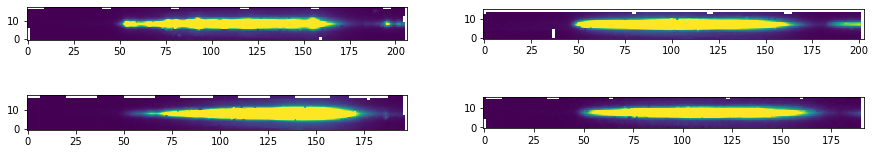

In [24]:
plt.rcParams["figure.figsize"] = (15,3)
plt.subplot(2,2,1)
ID = 5
try:
    d1 = fits.open("OUTPUT/jdql01jxq_flc_2.STP.fits")["BEAM_%dA" % (ID)].data
    im1 = plt.imshow(d1,origin="lower")
    im1.set_clim(0,400)
except:
    pass

plt.subplot(2,2,2)
ID = 2
try:
    d1 = fits.open("OUTPUT/jdql01jxq_flc_2.STP.fits")["BEAM_%dA" % (ID)].data
    im1 = plt.imshow(d1,origin="lower")
    im1.set_clim(0,150)
except:
    pass

plt.subplot(2,2,3)
ID = 44
try:
    d1 = fits.open("OUTPUT/jdql01jxq_flc_5.STP.fits")["BEAM_%dA" % (ID)].data
    im1 = plt.imshow(d1,origin="lower")
    im1.set_clim(0,200)
except:
    pass

plt.subplot(2,2,4)
ID = 42
try:
    d1 = fits.open("OUTPUT/jdql01jxq_flc_5.STP.fits")["BEAM_%dA" % (ID)].data
    im1 = plt.imshow(d1,origin="lower")
    im1.set_clim(0,100)
except:
    pass




We now examine the calibrated 1D spectra of one of the sources:

OUTPUT/jdql01jxq_flc_2.SPC.fits


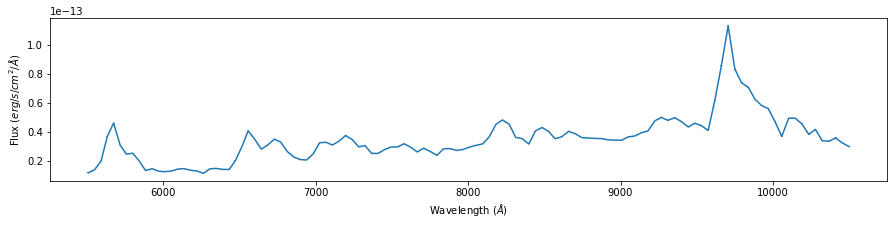

In [25]:
import glob
ID = 5
for s in glob.glob("OUTPUT/jdql01jxq_flc_2.SPC.fits"):
    print( s)
    d1 = fits.open(s)["BEAM_%dA" % (ID)].data
    w = d1["LAMBDA"]
    f = d1["FLUX"]
    e = d1["FERROR"]
    vg = (w>5500) & (w<10500)
    plt.errorbar(w[vg],f[vg],e[vg])
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Flux ($erg/s/cm^2/\AA$)');

OUTPUT/jdql01jxq_flc_2.SPC.fits


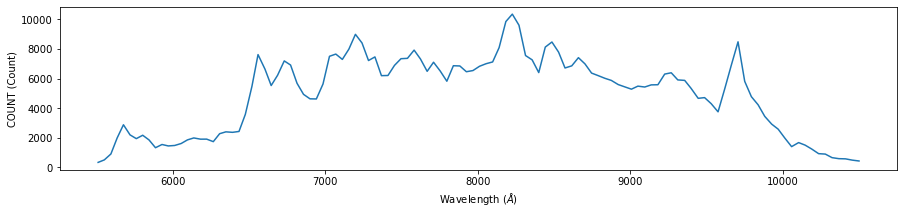

In [26]:
import glob
ID = 5
for s in glob.glob("OUTPUT/jdql01jxq_flc_2.SPC.fits"):
    print( s)
    d1 = fits.open(s)["BEAM_%dA" % (ID)].data
    w = d1["LAMBDA"]
    f = d1["COUNT"]
    vg = (w>5500) & (w<10500)
    plt.plot(w[vg],f[vg])
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'COUNT (Count)');

Contamination is not automatically removed but has been estimated and we can plot it

OUTPUT/jdql01jxq_flc_2.SPC.fits


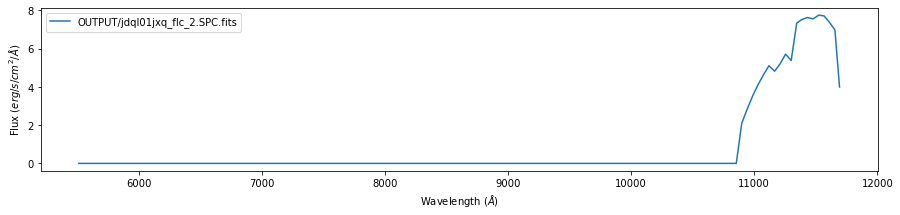

In [27]:
import glob
ID = 5
for s in glob.glob("OUTPUT/jdql01jxq_flc_2.SPC.fits"):
    print (s)
    d1 = fits.open(s)["BEAM_%dA" % (ID)].data
    w = d1["LAMBDA"]
    c = d1["CONTAM"]
    vg = (w>5500) & (w<12000)
    plt.plot(w[vg],c[vg],label=s)
plt.legend()
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Flux ($erg/s/cm^2/\AA$)');

In [28]:
!cat aXe.lis
print()
print(fits.open("DATA/jdql01jxq_flc.fits")[1].header["SKY_CPS"],"e/s")

jdql01jxq_flc.fits jdql01jvq_flc_2.cat,jdql01jvq_flc_1.cat jdql01jvq_flc.fits 
0.8881945907944584 e/s


# Simple Box Extraction

In [29]:
opt_extr=False

In [30]:
axetasks.drzprep(inlist = "aXe.lis", 
                 configs="ACS.WFC.CHIP1.Cycle13.5.conf,ACS.WFC.CHIP2.Cycle13.5.conf",
                 back = False,
                 opt_extr=opt_extr)

In [31]:
!ls -altr OUTPUT/*DPP*

-rw-r--r--  1 nhathi  STSCI\science  2240640 Apr  1 17:48 OUTPUT/jdql01jxq_flc_5.DPP.fits
-rw-r--r--  1 nhathi  STSCI\science  2099520 Apr  1 17:48 OUTPUT/jdql01jxq_flc_2.DPP.fits


In [32]:
# infwhm (extrfwhm) & outfwhm (drzfwhm) can be (5,4)(wide), (4,3)(default) or (3,2)(narrow)
axetasks.axecrr(inlist="aXe.lis",
                configs="ACS.WFC.CHIP1.Cycle13.5.conf,ACS.WFC.CHIP2.Cycle13.5.conf",
                infwhm = 4.0,
                outfwhm = 3.0,
                back = False,
                driz_separate = 'yes',
                opt_extr=opt_extr)

Deleting old directory...
Creating temporary directory:  DRIZZLE/tmp
Drizzling object : ID48 ... 
Done!
Drizzling object : ID33 ... 
Done!
Drizzling object : ID44 ... 
Done!
Drizzling object : ID29 ... 
Done!
Drizzling object : ID28 ... 
Done!
Drizzling object : ID45 ... 
Done!
Drizzling object : ID32 ... 
Done!
Drizzling object : ID49 ... 
Done!
Drizzling object : ID42 ... 
Done!
Drizzling object : ID39 ... 
Done!
Drizzling object : ID35 ... 
Done!
Drizzling object : ID34 ... 
Done!
Drizzling object : ID38 ... 
Done!
Drizzling object : ID43 ... 
Done!
Drizzling object : ID40 ... 
Done!
Drizzling object : ID37 ... 
Done!
Drizzling object : ID36 ... 
Done!
Drizzling object : ID41 ... 
Done!
Drizzling object : ID27 ... 
Done!
Drizzling object : ID31 ... 
Done!
Drizzling object : ID46 ... 
Done!
Drizzling object : ID50 ... 
Done!
Drizzling object : ID51 ... 
Done!
Drizzling object : ID30 ... 
Done!
Drizzling object : ID24 ... 
Done!
Drizzling object : ID9 ... 
Done!
Drizzling object : ID1

The extraction results are in the DRIZZLE directory we created, and we can examine a 2D, rectified and wavelength calibrated version of the spectrum we looked at earlier:

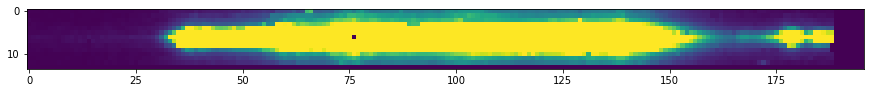

In [33]:
ID = 5
d = fits.open("./DRIZZLE/aXedrizzle_2.STP.fits")["BEAM_%dA" % (ID)].data
im = plt.imshow(d)
im.set_clim(0,100)

We plot the extracted 1D spectra of our source and the estimate of the contamination:

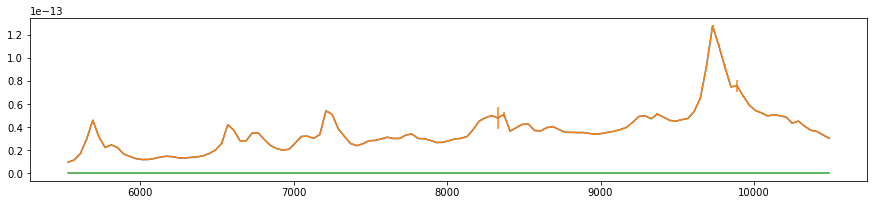

In [34]:
fin = fits.open("./DRIZZLE/aXedrizzle_2.SPC.fits")
tdata = fin["BEAM_%dA" % (ID)].data
x = tdata["LAMBDA"]
f = tdata["FLUX"]
e = tdata["FERROR"]

c = tdata["CONTAM"]
vg = (x>5500) & (x<10500)
plt.plot(x[vg],f[vg])
plt.errorbar(x[vg],f[vg],e[vg])

plt.plot(x[vg],c[vg])

The MEF files in the DRIZZLE directory contain the 2D version of the spectrum of a source as well as estimate of the contamination:

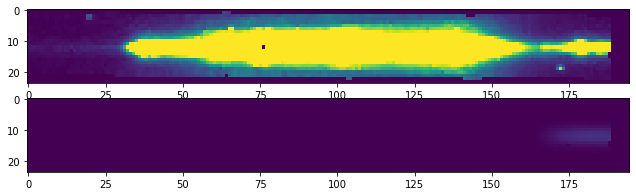

In [35]:
plt.subplot(2,1,1)
d = fits.open("./DRIZZLE/aXedrizzle_mef_ID%d.fits" % (ID))["SCI"].data
im = plt.imshow(d)
im.set_clim(0,50)

plt.subplot(2,1,2)
d = fits.open("./DRIZZLE/aXedrizzle_mef_ID%d.fits" % (ID))["CON"].data
im = plt.imshow(d)
im.set_clim(0,10)

The individually extracted spectra are in the OUTPUT directory and the combined ones in the DRIZZLE directory. We can plot and compare them:

OUTPUT/jdql01jxq_flc_2.SPC.fits


<ErrorbarContainer object of 3 artists>

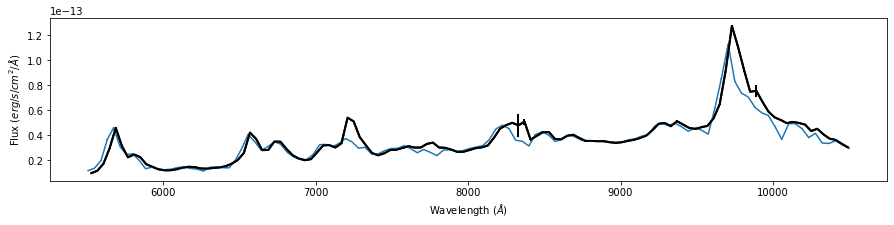

In [36]:
import glob

for s in glob.glob("OUTPUT/jdql01jxq_flc_2.SPC.fits"):
    print(s)
    d1 = fits.open(s)["BEAM_%dA" % (ID)].data
    w = d1["LAMBDA"]
    f = d1["FLUX"]
    e = d1["FERROR"]
    vg = (w>5500) & (w<10500)
    plt.errorbar(w[vg],f[vg],e[vg])
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Flux ($erg/s/cm^2/\AA$)');


fin = fits.open("./DRIZZLE/aXedrizzle_2.SPC.fits")
tdata = fin["BEAM_%dA" % (ID)].data
x = tdata["LAMBDA"]
f = tdata["FLUX"]
e = tdata["FERROR"]

c = tdata["CONTAM"]
vg = (x>5500) & (x<10500)
#plt.errorbar(x[vg],y[vg],e[vg])
plt.plot(x[vg],f[vg],color='k',lw=2)
plt.errorbar(x[vg],f[vg],e[vg],color='k',lw=2)